In [2]:
import tifffile
import matplotlib.pyplot as plt
import nd2
from copy import deepcopy

In [4]:
nd2.ND2File("100x_PSF_postmag.nd2").metadata.channels[0]

/tmp/ipykernel_4689/2055507892.py:1: UserWarning: ND2File file not closed before garbage collection. Please use `with ND2File(...):` context or call `.close()`.
  nd2.ND2File("100x_PSF_postmag.nd2").metadata.channels[0]


Channel(channel=ChannelMeta(name='TetraOrange1', index=0, colorRGB=49151, emissionLambdaNm=595.0, excitationLambdaNm=561.0), loops=LoopIndices(NETimeLoop=None, TimeLoop=None, XYPosLoop=None, ZStackLoop=0), microscope=Microscope(objectiveMagnification=100.0, objectiveName='Plan Apo λ 100x Oil Ph3 DM', objectiveNumericalAperture=1.45, zoomMagnification=1.5, immersionRefractiveIndex=1.515, projectiveMagnification=None, pinholeDiameterUm=None, modalityFlags=['fluorescence']), volume=Volume(axesCalibrated=(True, True, True), axesCalibration=(0.043333333333333335, 0.043333333333333335, 0.05), axesInterpretation=('distance', 'distance', 'distance'), bitsPerComponentInMemory=16, bitsPerComponentSignificant=16, cameraTransformationMatrix=(-1.0, -6.982962677686267e-15, 6.982962677686267e-15, -1.0), componentCount=1, componentDataType='unsigned', voxelCount=(2304, 2304, 101), componentMaxima=[0.0], componentMinima=[0.0], pixelToStageTransformationMatrix=None))

In [9]:
dark_red = tifffile.imread("average_100x_PSF_postmag_475nm.tif")
green = tifffile.imread("average_100x_PSF_postmag_515nm.tif")
orange = tifffile.imread("average_100x_PSF_postmag_595nm.tif")


In [16]:
def normalise_profile(profile):
    profile = deepcopy(profile)
    profile -= profile.min()
    profile /= profile.max()
    return profile

(100.0, 140.0)

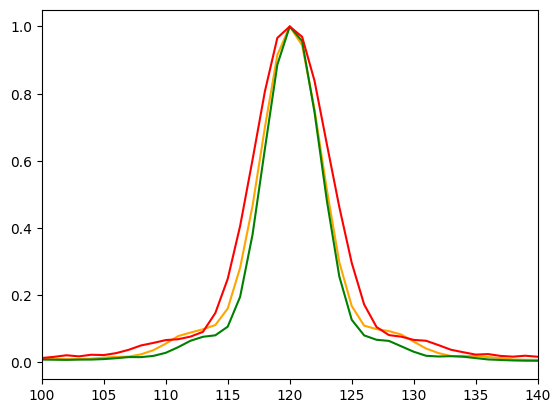

In [19]:
orange_profile = normalise_profile(orange[241//2,241//2])
green_profile = normalise_profile(green[241//2,241//2])
dark_red_profile = normalise_profile(dark_red[241//2,241//2])

plt.plot(orange_profile, c = "orange")
plt.plot(green_profile, c = "g")
plt.plot(dark_red_profile, c = "r")

plt.xlim(100,140)

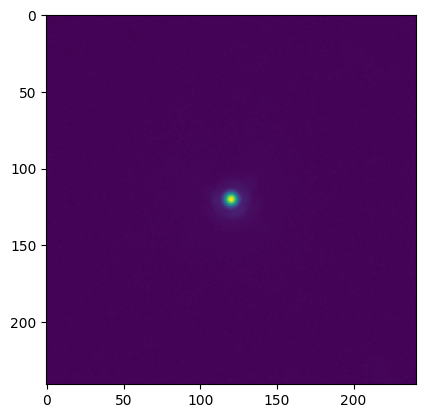

In [7]:
plt.imshow(dark_red[241//2])

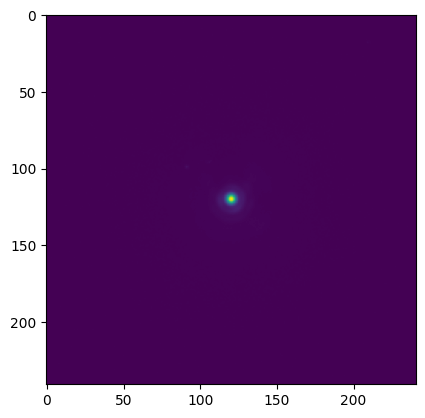

In [10]:
plt.imshow(green[241//2])